# Capstone Project Part 08: Exploratory Data Analysis (EDA) and Cleaning | S&P 1500 Companies

## Import libraries and modules

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Pivoted Data

- Load `pivot_sp500.csv` and `pivot_sp1000.csv` from `data` folder into a pandas DataFrame
- Check data types for each columns

In [2]:
edgar_sp500 = pd.read_csv('../data/pivot_sp500.csv', low_memory=False)
edgar_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 47929 entries, A A G Mandatorily Convertible Preferred Stock to year
dtypes: float64(38240), int64(1), object(9688)
memory usage: 1.1+ GB


In [3]:
edgar_sp1000 = pd.read_csv('../data/pivot_sp1000.csv', low_memory=False)
edgar_sp1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Columns: 60002 entries, A A C Note Securedby R M B S Securities Value Not Less Than to year
dtypes: float64(49206), int64(1), object(10795)
memory usage: 2.2+ GB


---

## Concatenate `edgar_sp500` and `edgar_sp1000`

In [4]:
df = pd.concat((edgar_sp500, edgar_sp1000)).reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Columns: 98308 entries, A A G Mandatorily Convertible Preferred Stock to Zero Point Five Percent Decrease In Expected Long Term Rate Of Return On Plan Assets Estimated Effect On Pension Expense
dtypes: float64(79662), int64(1), object(18645)
memory usage: 5.8+ GB


---

In [6]:
df = df[df.isnull().sum().sort_values()[:50].index]

In [7]:
str_features = [
    'Amendment Flag',
    'Current Fiscal Year End Date',
    'Document Fiscal Period Focus',
    'Document Type',
    'Entity Central Index Key',
    'Entity Current Reporting Status',
    'Entity Filer Category',
    'Entity Registrant Name',
    'Entity Voluntary Filers',
    'Entity Well Known Seasoned Issuer',
    'security'
]

In [8]:
float_features = [f for f in df.columns if f not in str_features and f != 'Document Period End Date']

In [9]:
df[float_features] = df[float_features].fillna(0).astype(float)
df['Document Period End Date'] = pd.to_datetime(df['Document Period End Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 50 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   security                                                                          7983 non-null   object        
 1   year                                                                              7983 non-null   float64       
 2   Cash And Cash Equivalents At Carrying Value                                       7983 non-null   float64       
 3   Income Tax Expense Benefit                                                        7983 non-null   float64       
 4   Stockholders Equity                                                               7983 non-null   float64       
 5   Weighted Average Number Of Diluted Shares Outstanding         

---

In [11]:
df.isnull().sum(1).value_counts()

0     4933
11    3045
10       3
2        1
9        1
dtype: int64

In [12]:
df = df[df.isnull().sum(1) == 0]

---

## Plotting And Interpreting Data

### Distribution Boxplot Of Values By Features

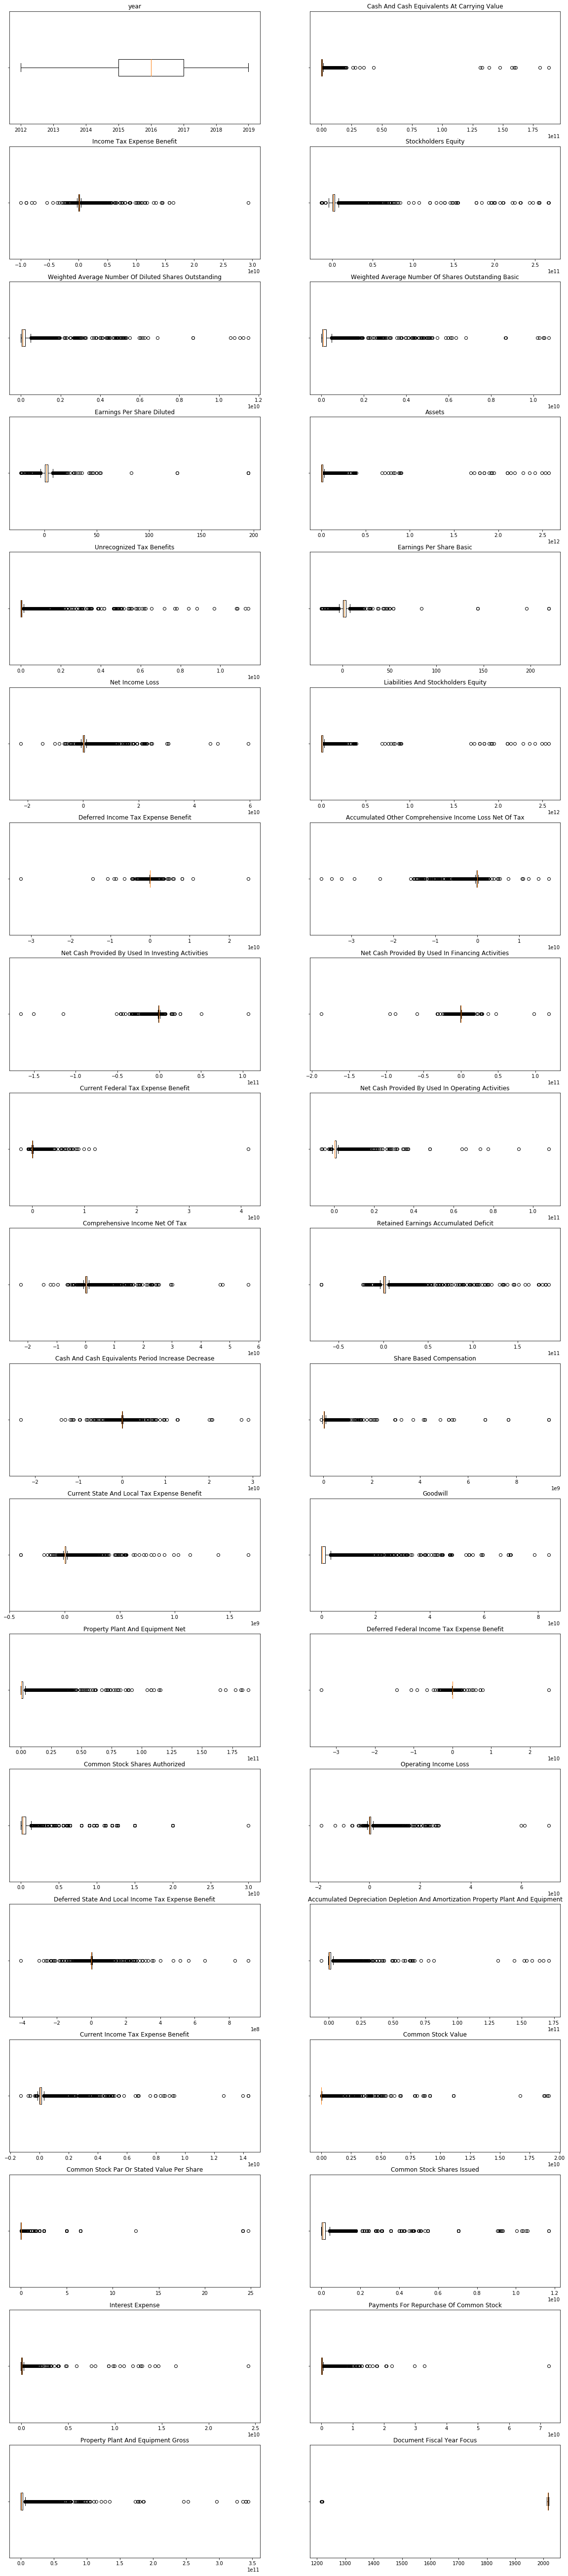

In [13]:
ncols = 2
nrows = len(float_features) // ncols
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
for n, f in enumerate(float_features):
    ax[n].boxplot(df[f], vert=False)
    ax[n].set_title(f)
    ax[n].set_yticklabels([])

In [14]:
df.loc[df['Document Fiscal Year Focus'] < 1300, ['year', 'Document Period End Date', 'Document Fiscal Year Focus']]

,year,Document Period End Date,Document Fiscal Year Focus
1522,2015.0,2015-12-31,1215.0
1523,2016.0,2016-12-31,1216.0
1524,2017.0,2017-12-31,1217.0
1525,2018.0,2018-12-31,1218.0


There's an obvious error in `Document Fiscal Year Focus` as majority of the data lies within the 2010s. Since the correct value is the same as `year` and `Document Period End Date`, to drop this feature.

In [15]:
df.drop(
    columns='Document Fiscal Year Focus',
    inplace=True
)

---

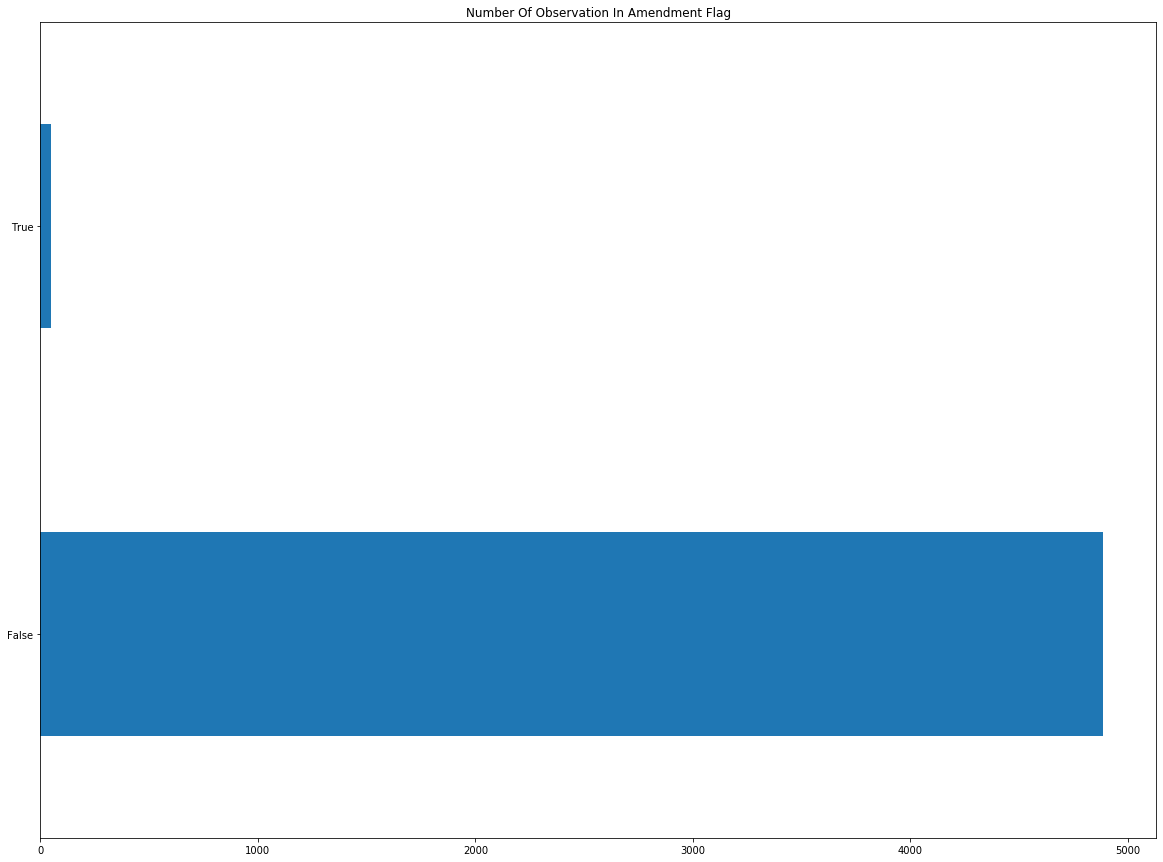

In [16]:
df['Amendment Flag'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Amendment Flag'
);

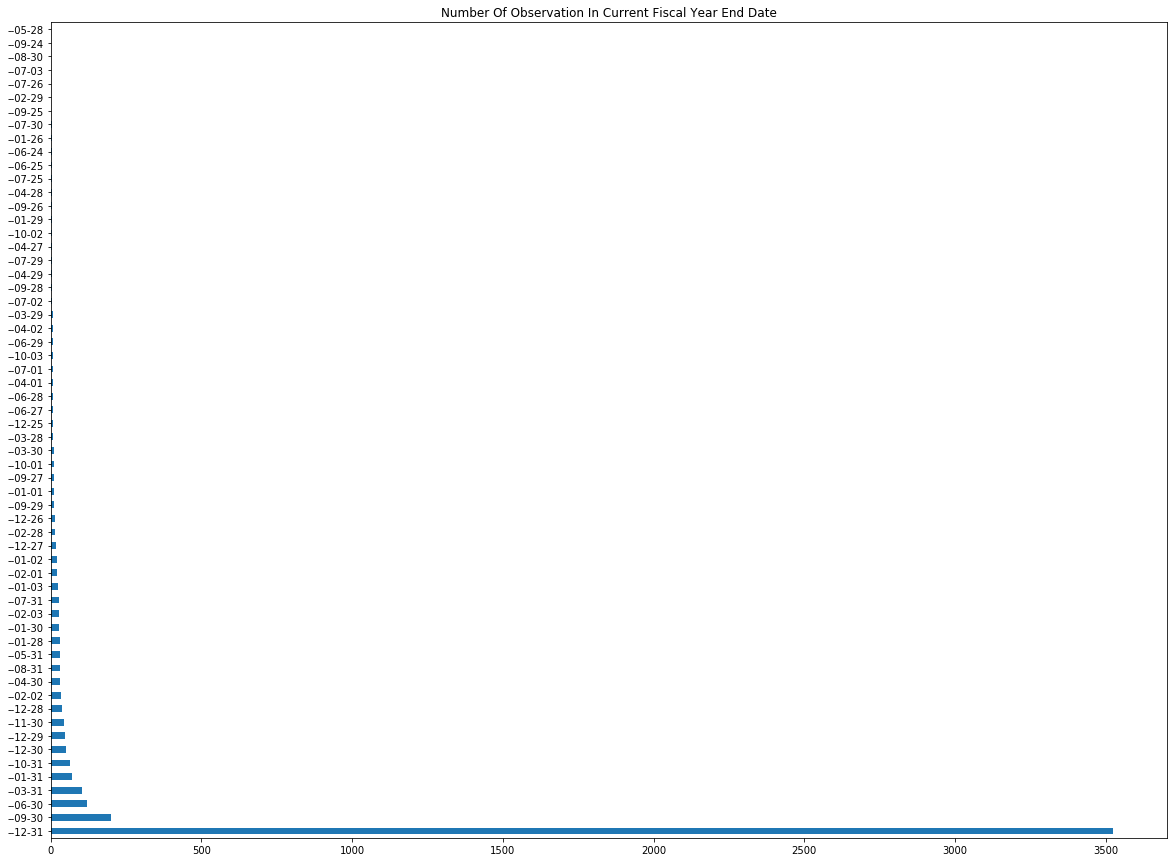

In [17]:
df['Current Fiscal Year End Date'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Current Fiscal Year End Date'
);

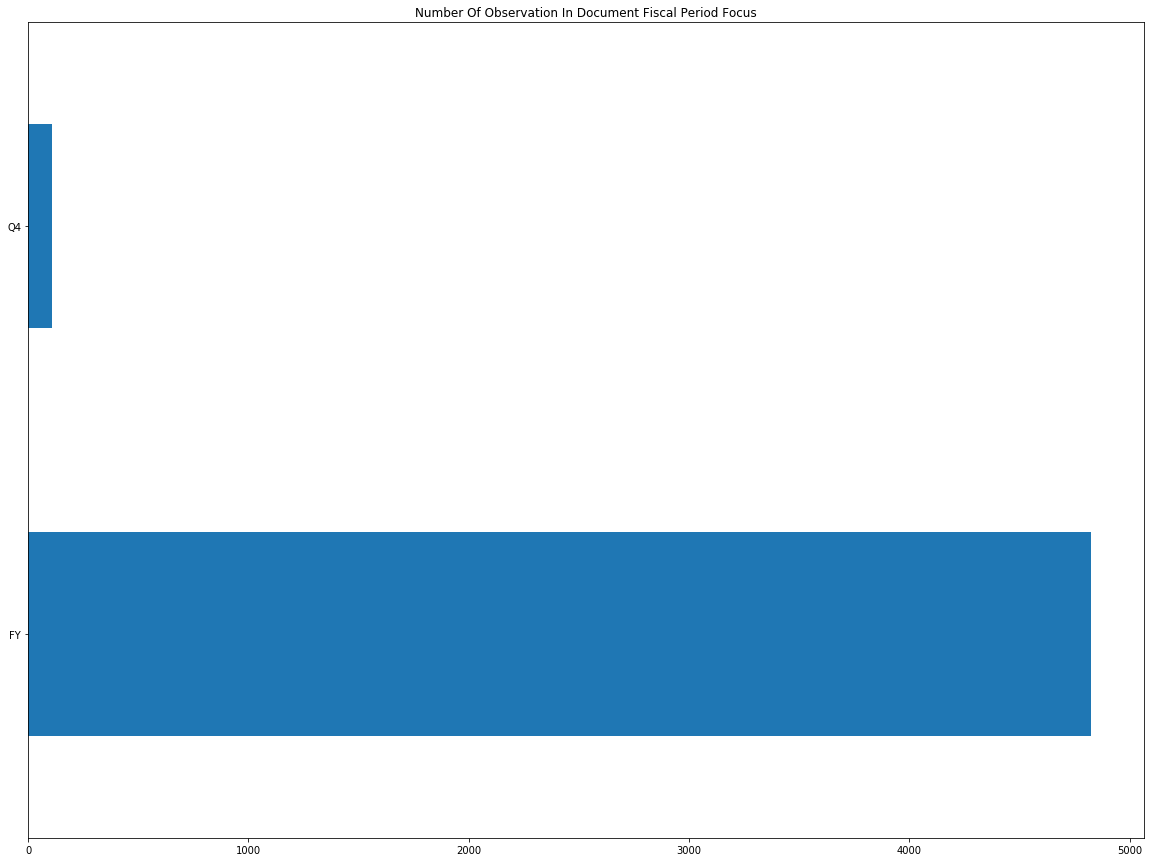

In [18]:
df['Document Fiscal Period Focus'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Document Fiscal Period Focus'
);

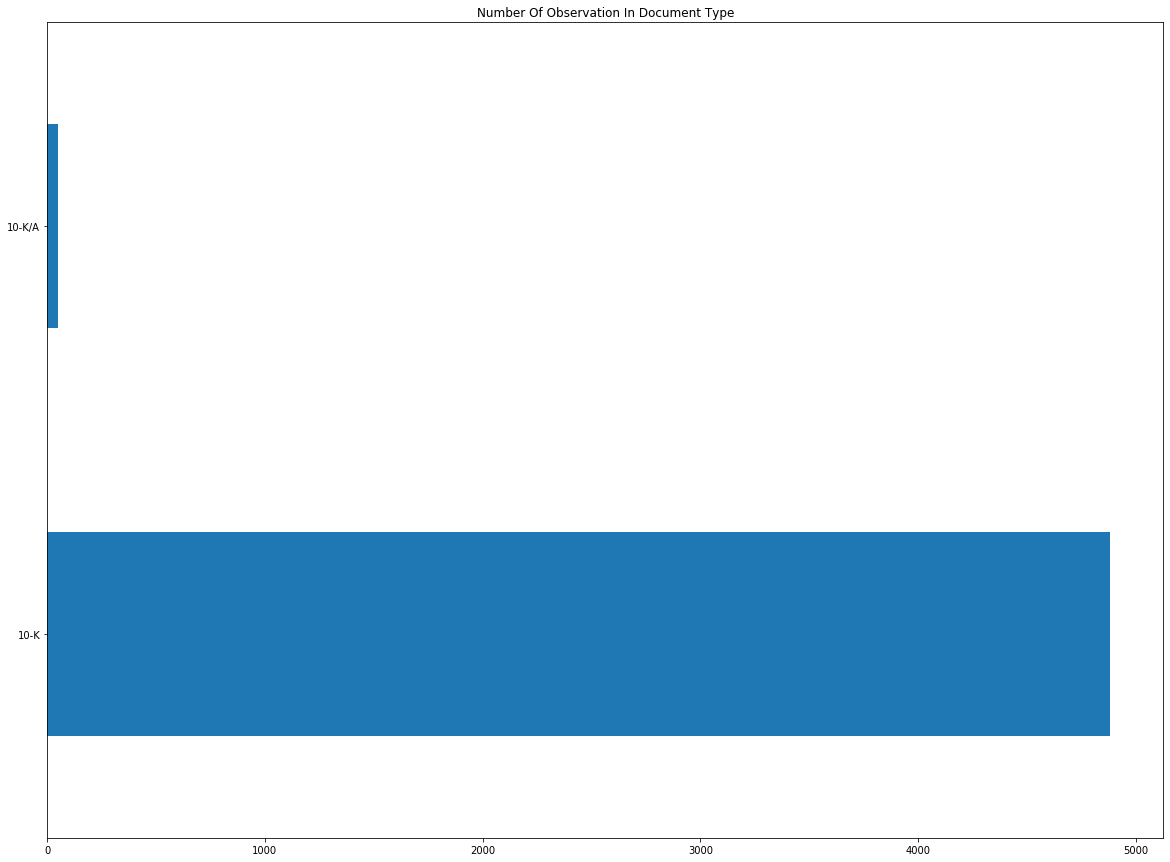

In [19]:
df['Document Type'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Document Type'
);

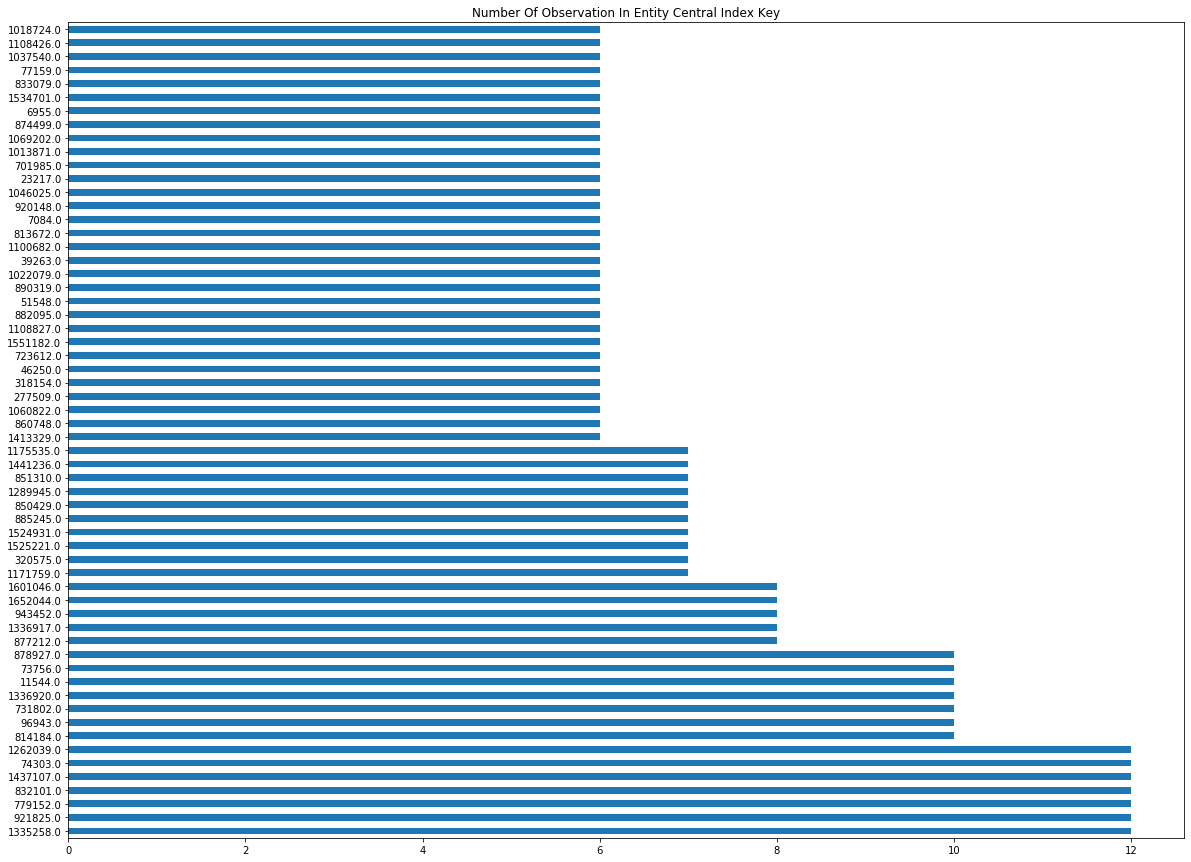

In [20]:
df['Entity Central Index Key'].value_counts().iloc[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Entity Central Index Key'
);

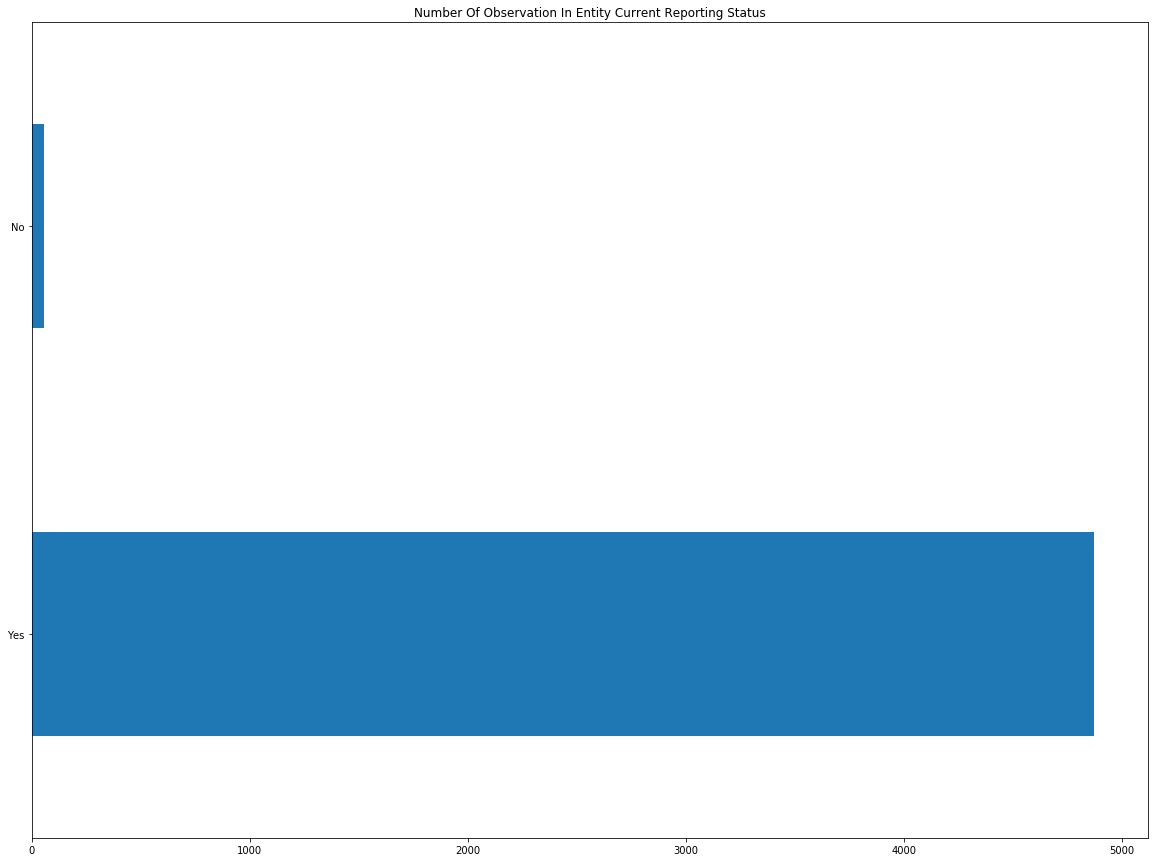

In [21]:
df['Entity Current Reporting Status'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Entity Current Reporting Status'
);

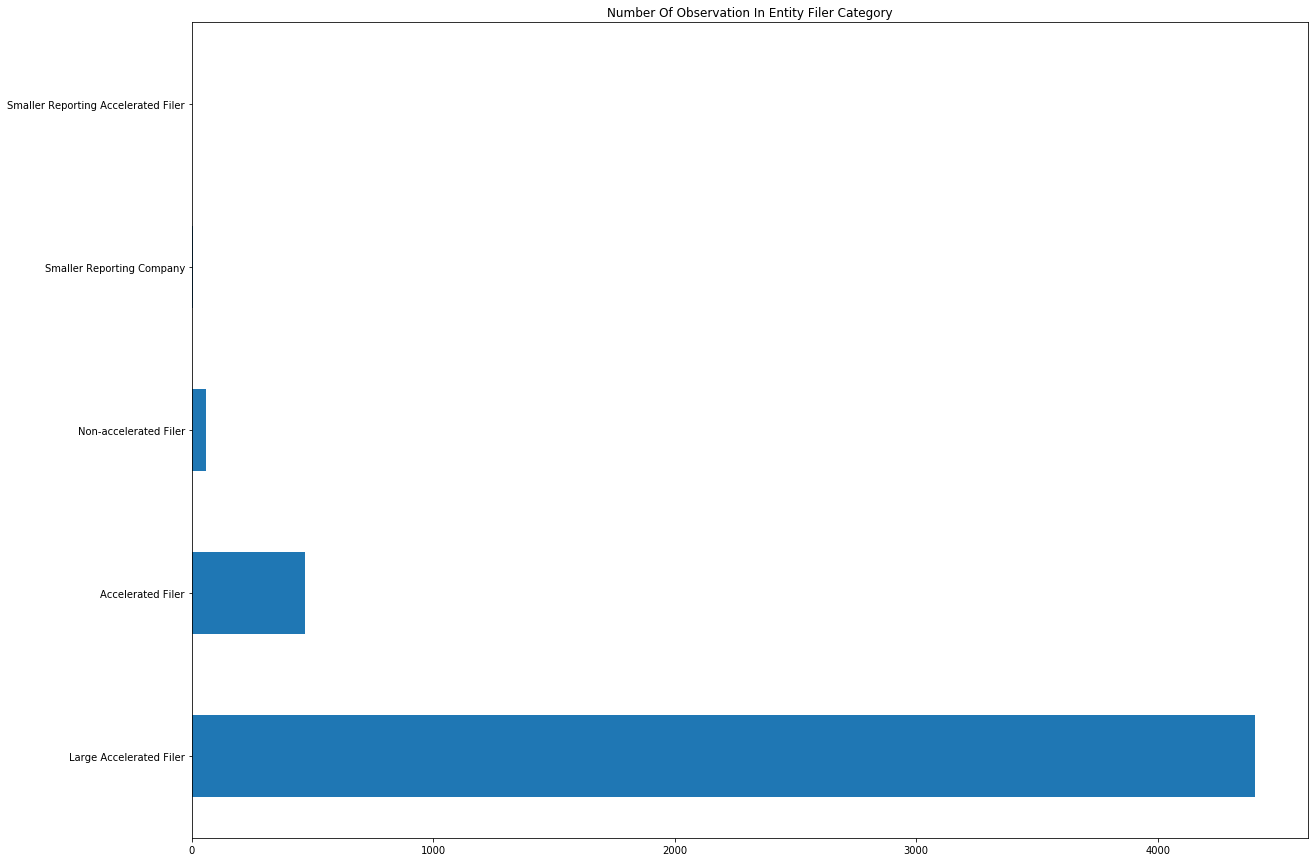

In [22]:
df['Entity Filer Category'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Entity Filer Category'
);

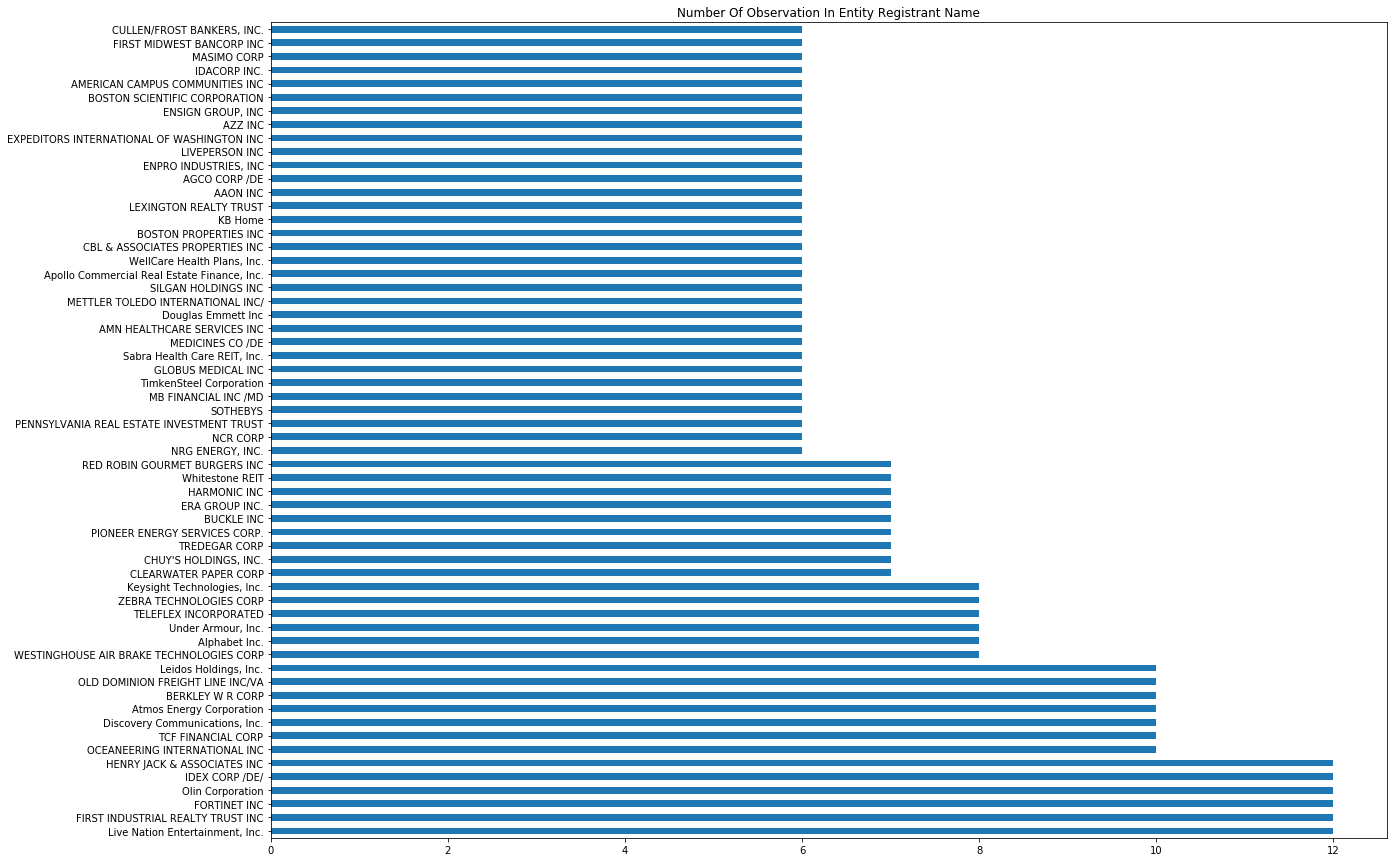

In [23]:
df['Entity Registrant Name'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation In Entity Registrant Name'
);

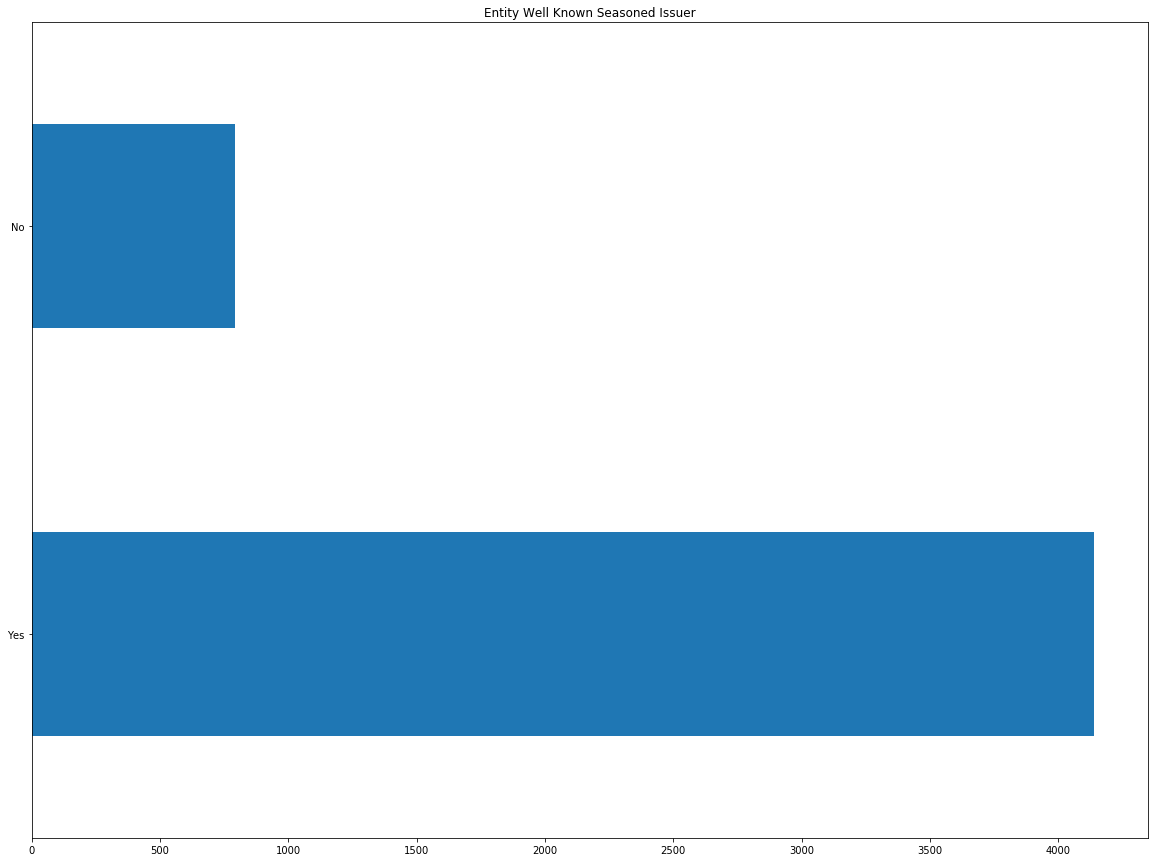

In [24]:
df['Entity Well Known Seasoned Issuer'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Entity Well Known Seasoned Issuer'
);

In [25]:
df.drop(
    columns=['Current Fiscal Year End Date', 'Entity Central Index Key', 'Entity Registrant Name'],
    inplace=True
)

---

### Generate a line plot for `Document Period End Date` with time on the $x$-axis.

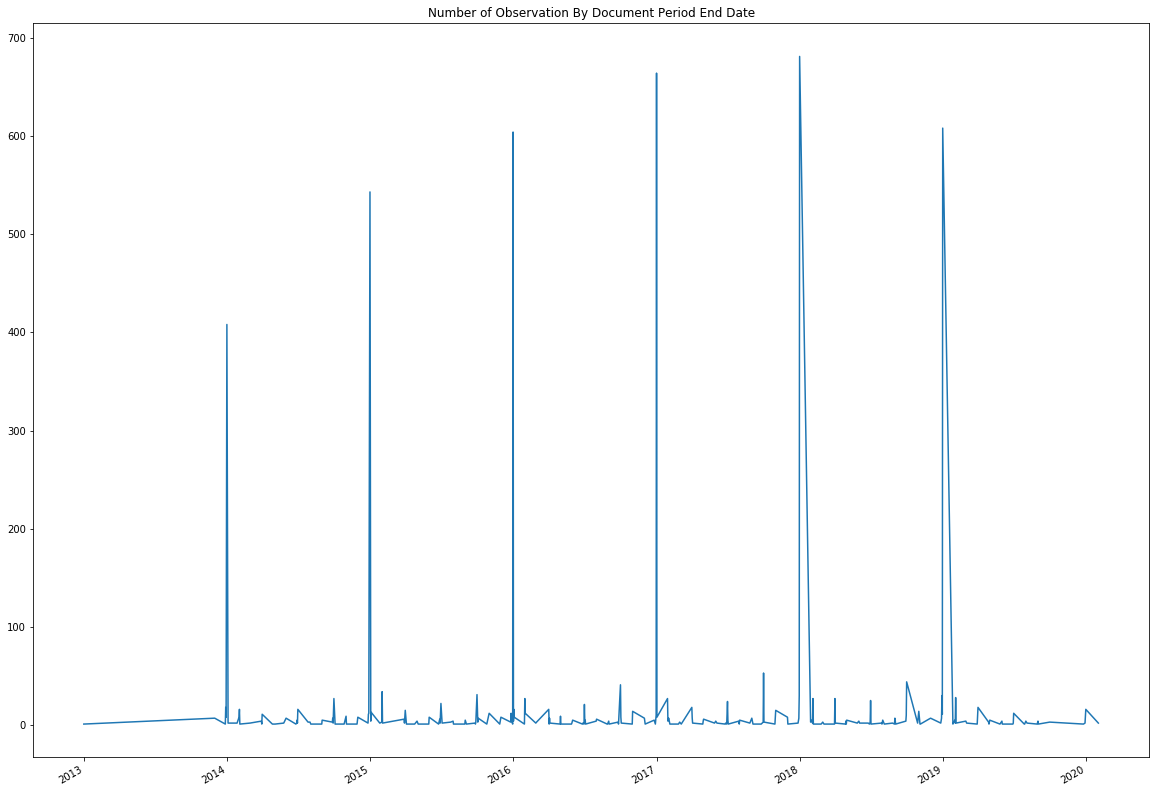

In [26]:
df['Document Period End Date'].value_counts().plot(
    figsize=(20, 15), 
    title='Number of Observation By Document Period End Date'
);

- There are clearly spikes at the end of every years. This is likely due to most companies having fiscal year end dates on 31 December. 

---

### Visualize Correlation Using A Heat Map

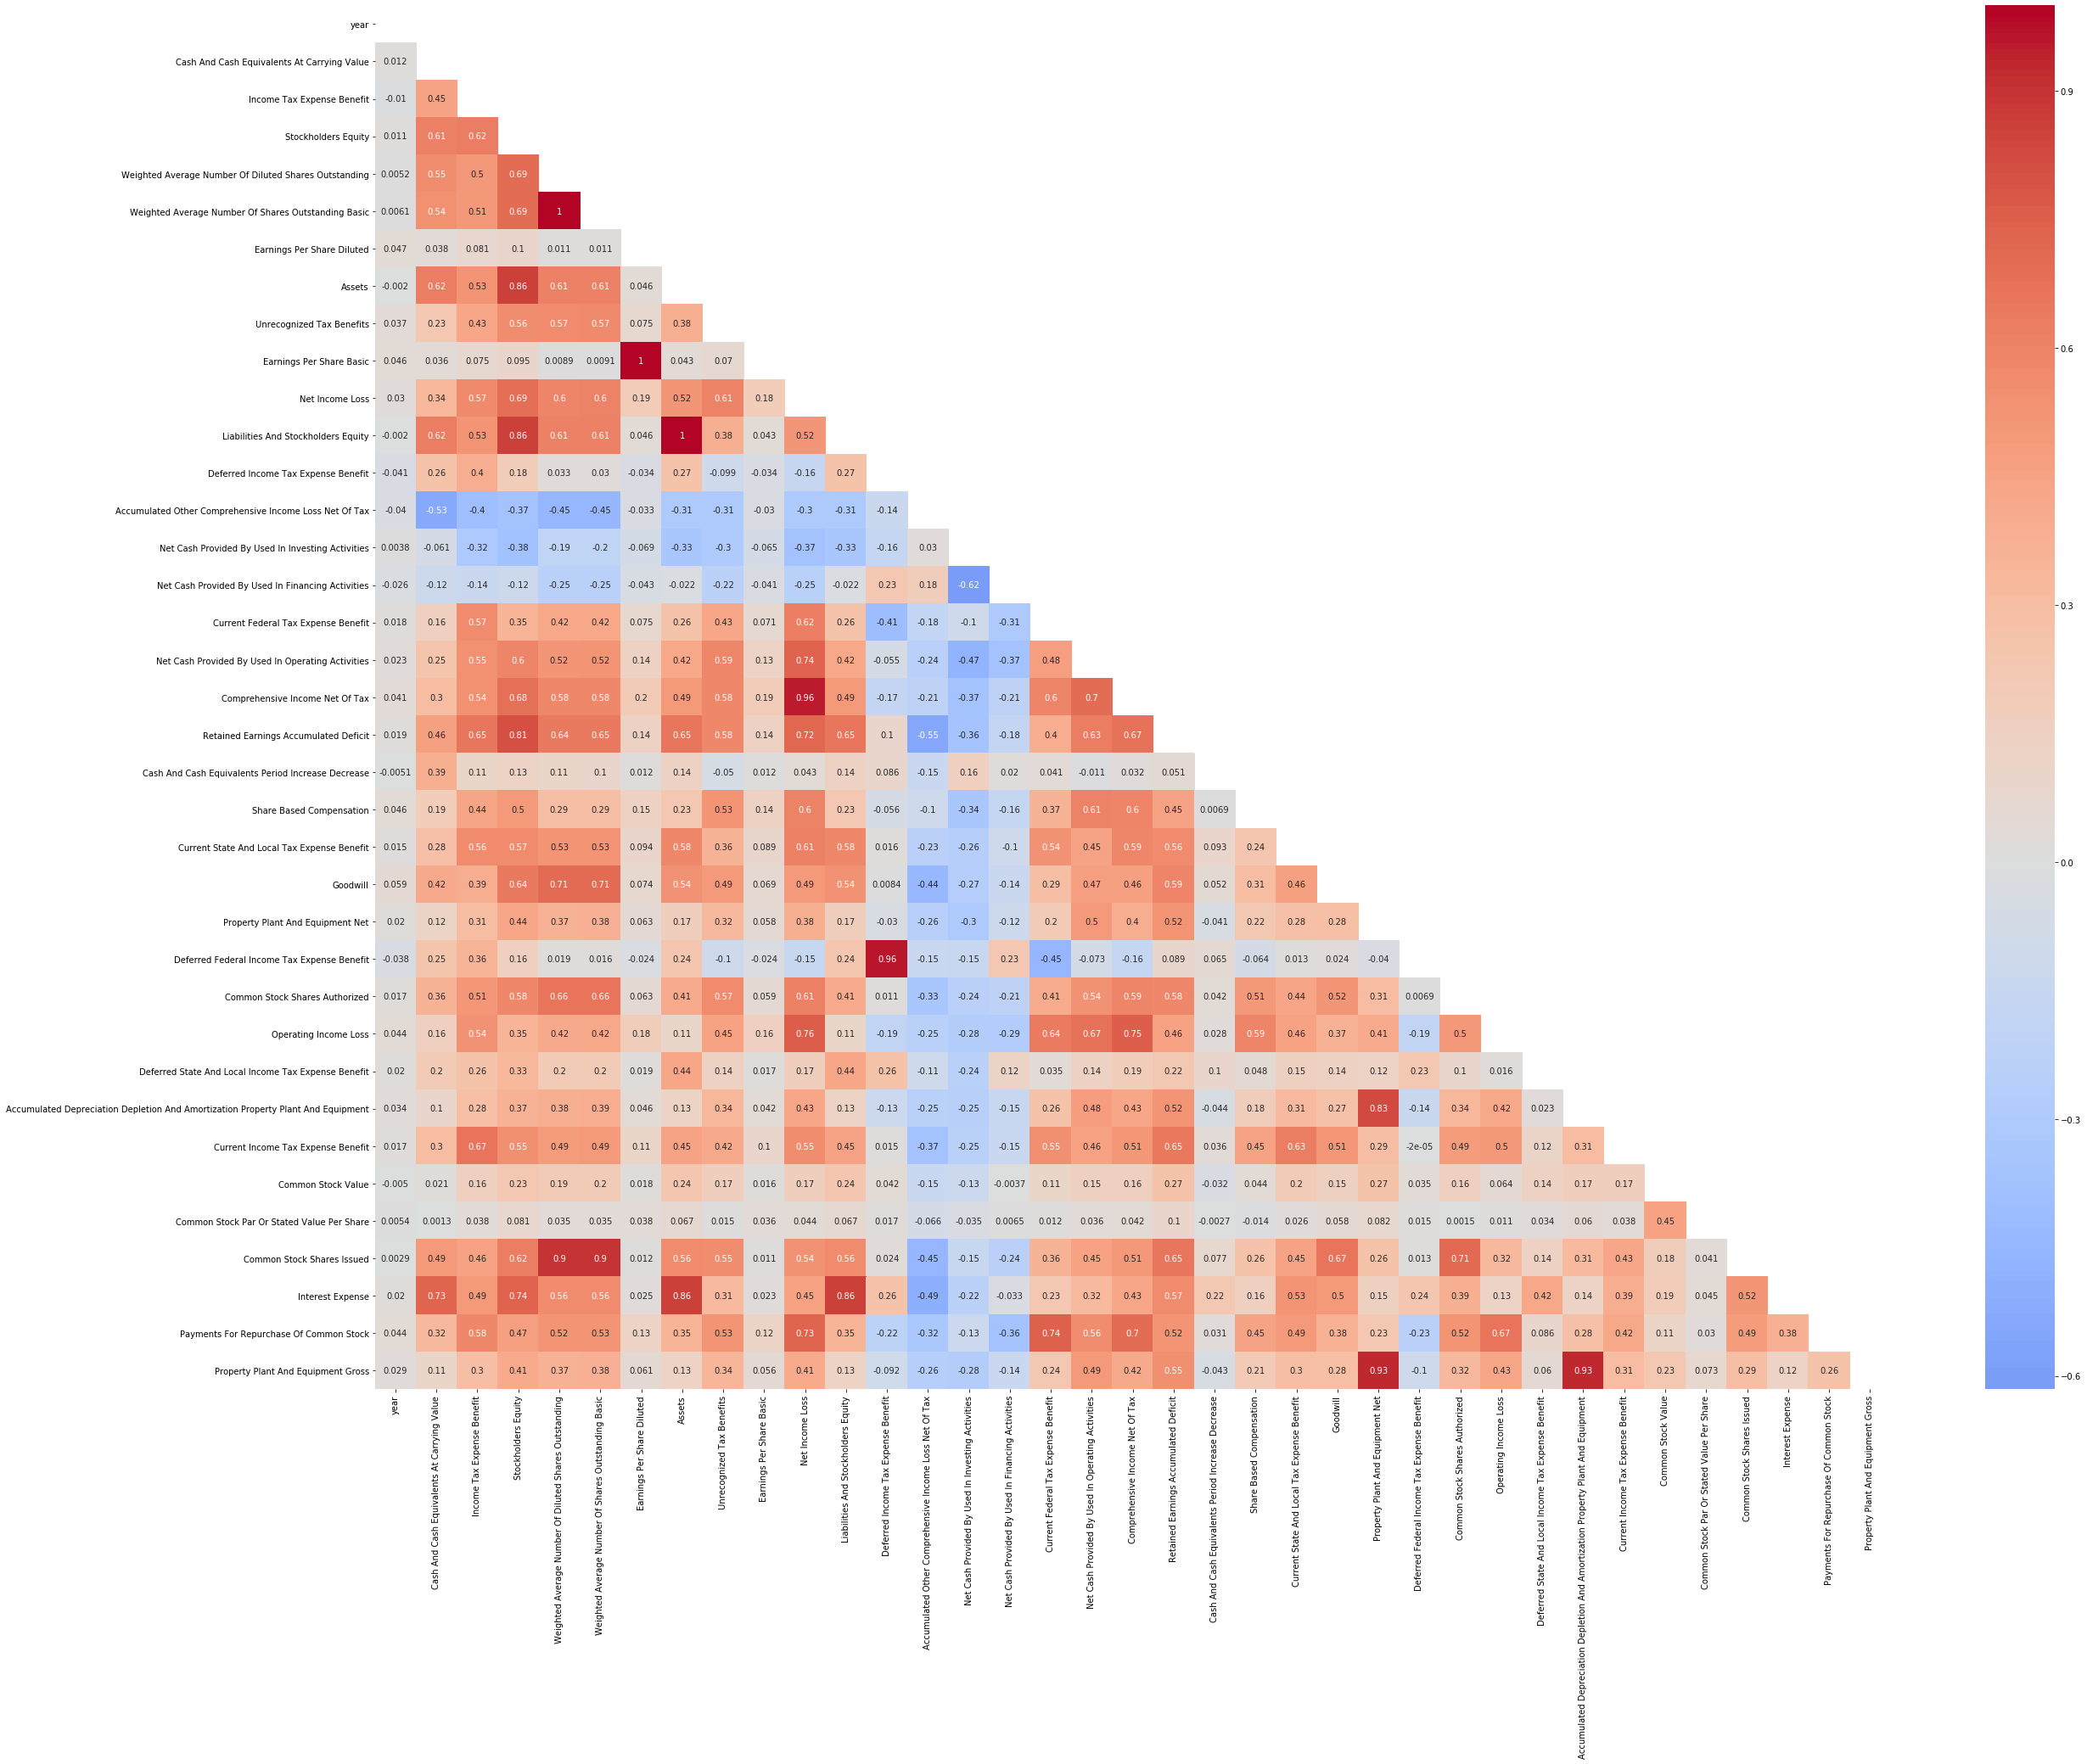

In [27]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(40, 30))
sns.heatmap(df_corr,
            cmap='coolwarm',
            center=0,
            annot=True,
            mask=mask);

In [28]:
# To drop one of the two features with correlation of 1
df.drop(
    columns=[
        'Earnings Per Share Diluted',
        'Liabilities And Stockholders Equity',
        'Weighted Average Number Of Diluted Shares Outstanding'
    ],
    inplace=True
)

---

## Export To `csv`

In [29]:
df.to_csv('../data/clean.csv', index=False)